<a href="https://colab.research.google.com/github/ayushsahu1999/100-days-of-ml/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
mnist_dataset = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
import numpy as np
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [51]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy') > 0.999):
      print ("\nAccuracy is now above 99.5% so stopping training!")
      self.model.stop_training = True

In [52]:
callbacks = myCallback()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               5538304   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 5,544,074
Trainable params: 5,544,074
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0109 - accuracy: 0.9965
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0065 - accuracy: 0.9981
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0055 - accuracy: 0.9984
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0047 - accuracy: 0.9984
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0047 - accuracy: 0.9984
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0039 - accuracy: 0.9987
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0037 - accuracy: 0.9987
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0036 - accuracy: 0.9988
Epoch 9/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0024 - accuracy: 0.9993
Accuracy is now above 99.5% so stopping training!
1875/1875 [=========================

In [54]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0892 - accuracy: 0.9858


In [9]:
print (test_loss, test_accuracy)

0.05970437452197075 0.9836000204086304


In [48]:
image = 45
answer = np.argmax(model.predict(x_test[image].reshape(1, 28, 28, 1)), axis=-1)
print (answer.squeeze())

5


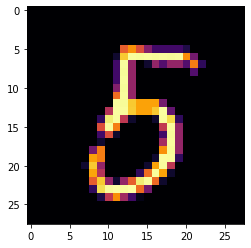

In [49]:
import matplotlib.pyplot as plt
plt.imshow(x_test[image].reshape(28, 28), cmap='inferno')

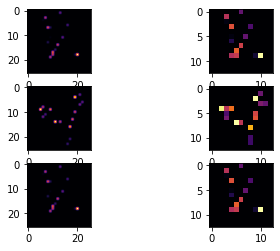

In [55]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3, 2)

FIRST_IMAGE = 1
SECOND_IMAGE = 67
THIRD_IMAGE = 45
CONVOLUTION_NUMBER = 5
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]

activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0, 2):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0, x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1, x].grid(False)
  f3 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2, x].grid(False)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0
